In [2]:
import mysql.connector
import pandas as pd

db = mysql.connector.connect(
    host="localhost",  
    user="root",      
    password="Priya@16",   
    database="startups" 
)

cursor = db.cursor()
cursor

In [3]:
query = "SELECT * FROM startups.table"
df = pd.read_sql(query, db)
df

C:\Users\s.sathishkumar\AppData\Local\Temp\ipykernel_8964\3517023617.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"
...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,,,,Asia Pacific Internet Group,Private Equity,"4,500,000"
2368,2368,29/01/2015,Graphene,,,,KARSEMVEN Fund,Private Equity,"825,000"
2369,2369,30/01/2015,Mad Street Den,,,,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000"
2370,2370,30/01/2015,Simplotel,,,,MakeMyTrip,Private Equity,


In [4]:
missing_values = df['AmountInUSD'].isnull().sum()
missing_values

0

In [5]:
zero_count=(df['AmountInUSD'] == 0).sum()
zero_count

0

In [6]:
df['AmountInUSD']=df['AmountInUSD'].astype(str)
df['AmountInUSD']=df['AmountInUSD'].str.replace(',','')
df['AmountInUSD']= pd.to_numeric(df['AmountInUSD'],errors='coerce')
df['AmountInUSD'].fillna(0, inplace=True) 

In [7]:
#Measures
#convert AmountInUSD to numeric
mean_value= df['AmountInUSD'].mean()
median_value = df['AmountInUSD'].median()
mode_value = df['AmountInUSD'].mode()[0]
std_dev = df['AmountInUSD'].std()
max_value = df['AmountInUSD'].max()
min_value = df['AmountInUSD'].min()
total_sum =df['AmountInUSD'].sum()
print(f"mean_value:{mean_value}")
print(f"total_sum:{total_sum}")
print(f"mode_value:{mode_value}")
print(f"std_dev:{std_dev}")
print(f"max_value:{max_value}")
print(f"min_value:{min_value}")
print(f"total_sum:{total_sum}")

mean_value:7734985.866779089
total_sum:18347386476.0
mode_value:0.0
std_dev:51658323.53869951
max_value:1400000000.0
min_value:0.0
total_sum:18347386476.0


In [8]:
unique_values= df['InvestmentType'].unique()
unique_values

array(['Private Equity', 'Seed Funding', 'Debt Funding', '',
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [9]:
group_size=df.groupby('InvestmentType').size()
group_size

InvestmentType
                     1
Crowd Funding        1
Crowd funding        1
Debt Funding         1
Private Equity    1066
PrivateEquity        1
Seed Funding      1271
SeedFunding         30
dtype: int64

In [10]:
Q1=df['AmountInUSD'].quantile(0.25)
Q3=df['AmountInUSD'].quantile(0.75)
IQR= Q3-Q1

lower= Q1 - 1.5 * IQR
upper= Q3 + 1.5 * IQR

df= df[(df['AmountInUSD'] <= lower ) | ( df['AmountInUSD'] >= upper)]
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,20000000.0
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,8500000.0
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,12000000.0
19,19,12/07/2017,Innoviti,Technology,Digital payments solutions,Bangalore,"SBI-FMO Fund, Bessemer Venture Partners, Catam...",Private Equity,18500000.0
31,31,19/07/2017,Rentomojo,Consumer Internet,Consumer Leasing Platform,Bangalore,"ain Capital Ventures, Renaud Laplanche",Private Equity,10000000.0
...,...,...,...,...,...,...,...,...,...
2350,2350,20/01/2015,Hopscotch,,,,Eduardo Saverin & Velos Capital,Private Equity,11000000.0
2353,2353,21/01/2015,Simplilearn,,,,"Mayfield India, Kalaari Capital, Helion Ventures",Private Equity,14750000.0
2360,2360,22/01/2015,Antuit,,,,"Goldman Sachs, Zodius Capital",Private Equity,56000000.0
2361,2361,22/01/2015,Caratlane.com,,,,Tiger Global,Private Equity,31000000.0


In [11]:
group_size=df.groupby('InvestmentType').size()
group_size

InvestmentType
Debt Funding        1
Private Equity    354
Seed Funding        1
dtype: int64

In [12]:
df=df.dropna(subset=['AmountInUSD','InvestmentType'])
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,20000000.0
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,8500000.0
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,12000000.0
19,19,12/07/2017,Innoviti,Technology,Digital payments solutions,Bangalore,"SBI-FMO Fund, Bessemer Venture Partners, Catam...",Private Equity,18500000.0
31,31,19/07/2017,Rentomojo,Consumer Internet,Consumer Leasing Platform,Bangalore,"ain Capital Ventures, Renaud Laplanche",Private Equity,10000000.0
...,...,...,...,...,...,...,...,...,...
2350,2350,20/01/2015,Hopscotch,,,,Eduardo Saverin & Velos Capital,Private Equity,11000000.0
2353,2353,21/01/2015,Simplilearn,,,,"Mayfield India, Kalaari Capital, Helion Ventures",Private Equity,14750000.0
2360,2360,22/01/2015,Antuit,,,,"Goldman Sachs, Zodius Capital",Private Equity,56000000.0
2361,2361,22/01/2015,Caratlane.com,,,,Tiger Global,Private Equity,31000000.0


In [13]:
df['InvestmentType'] = df['InvestmentType'].astype('category')
df['InvestmentType'] 

7       Private Equity
8       Private Equity
9       Private Equity
19      Private Equity
31      Private Equity
             ...      
2350    Private Equity
2353    Private Equity
2360    Private Equity
2361    Private Equity
2365    Private Equity
Name: InvestmentType, Length: 356, dtype: category
Categories (3, object): ['Debt Funding', 'Private Equity', 'Seed Funding']

C:\Users\s.sathishkumar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


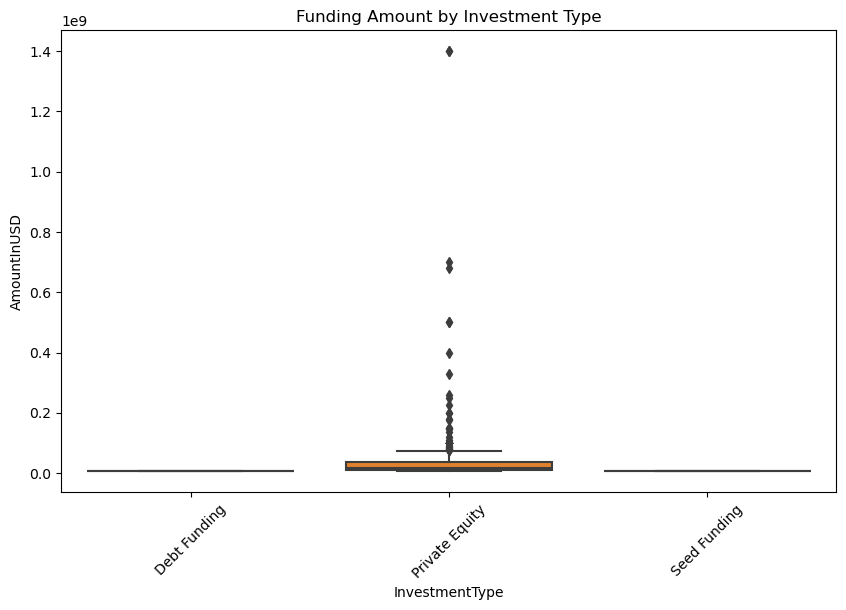

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for AmountInUSD by InvestmentType
plt.figure(figsize=(10, 6))
sns.boxplot(x='InvestmentType',y='AmountInUSD', data=df)
plt.title('Funding Amount by Investment Type')
plt.xticks(rotation=45)
plt.show()

In [15]:
from scipy.stats import f_oneway

# Perform ANOVA for InvestmentType
anova_result = f_oneway(
    df['AmountInUSD'][df['InvestmentType'] == 'Seed Funding'],
    df['AmountInUSD'][df['InvestmentType'] == 'Private Equity'],
    df['AmountInUSD'][df['InvestmentType'] == 'Debt Funding']  # Add more categories as needed
)
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA result: F-statistic = 0.09660476797472127, p-value = 0.9079387668961926


In [16]:
#Top Industries
Top_industries= df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)
print("Top 1 Funded Industries:")
print(Top_industries.head(1))

Top 1 Funded Industries:
IndustryVertical
Consumer Internet    3.357400e+09
Name: AmountInUSD, dtype: float64


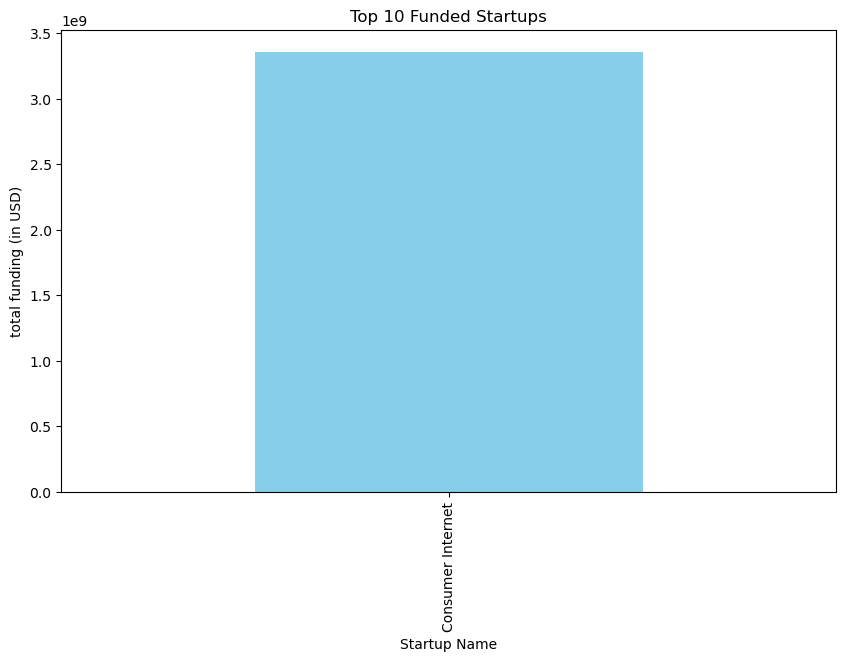

In [17]:
import matplotlib.pyplot as plt
Top_industries.head(1).plot(kind='bar',color='skyblue',figsize=(10,6))
plt.title('Top 10 Funded Startups')
plt.ylabel('total funding (in USD)')
plt.xlabel('Startup Name')
plt.show()


In [18]:
Top_startup=df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending= False)
most_funded_startup=Top_startup.idxmax()
most_funded_startup

'Bangalore'